<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Depp Learning - Dr. Fatemizadeh
</font>
<br/>
Fall 2022

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
Practical Assignment 2

Latin Alphabet
			</font>
</font>
</div>

# Personal Data

In [1]:
student_number = 98102527
Name = 'Ali'
Last_Name = 'Nourian'

# Import Libraries

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from time import localtime

# Device

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Import Data

In [5]:
train_val_df = pd.read_csv('Q3_train.csv')
print(train_val_df.shape) # 27455 * 785

(27455, 785)


In [6]:
test_df = pd.read_csv('Q3_test.csv')
print(test_df.shape) # 7172 * 785

(7172, 785)


In [7]:
train_val_df.groupby('label').describe()

pixel1                                                             \
        count        mean        std    min    25%    50%     75%    max   
label                                                                      
0      1126.0  164.192718  35.654405    9.0  146.0  168.0  187.00  251.0   
1      1010.0  145.215842  41.161590    0.0  130.0  153.0  172.00  236.0   
2      1144.0  160.759615  38.059112   37.0  142.0  167.0  186.00  251.0   
3      1196.0  135.755853  41.465282    0.0  108.0  141.5  166.00  235.0   
4       957.0  165.823406  33.563017   77.0  141.0  168.0  191.00  255.0   
5      1204.0  142.225914  36.677251   22.0  122.0  147.0  166.00  241.0   
6      1090.0  172.902752  28.232728  102.0  154.0  173.0  192.00  255.0   
7      1013.0  164.142152  33.420567   55.0  142.0  163.0  189.00  255.0   
8      1162.0  158.496558  34.650295   26.0  139.0  165.0  180.00  241.0   
10     1114.0   98.201077  39.890584    0.0   74.0  100.5  125.00  204.0   
11     1241.0  145.435939  28.758017   50.0  126.0  144.0  167.00  229.0   
12     1055.0  154.750711  34.344546   37.0  136.0  158.0  178.50  247.0   
13     1151.0  157.411816  37.304235   32.0  134.0  159.0  185.00  251.0   
14     1196.0  161.355351  31.850224   74.0  137.0  163.0  185.00  248.0   
15     1088.0  112.225184  44.957056    0.0   80.0  113.0  146.00  232.0   
16     1279.0  117.048475  45.341902    0.0   84.0  112.0  150.50  251.0   
17     1294.0  134.270479  34.784669   22.0  114.0  138.0  159.00  241.0   
18     1199.0  151.948290  34.918493   35.0  133.0  153.0  175.00  246.0   
19     1186.0  166.867622  28.011092   66.0  148.0  169.0  186.75  252.0   
20     1161.0  132.024117  38.873062   14.0  113.0  137.0  159.00  216.0   
21     1082.0  142.470425  34.697258    0.0  124.0  145.0  166.00  229.0   
22     1225.0  123.885714  40.580570   15.0   94.0  124.0  153.00  232.0   
23     1164.0  146.842784  46.260898    0.0  129.0  155.5  177.00  239.0   
24     1118.0  145.576029  36.007870   19.0  125.0  148.0  171.75  234.0   

       pixel2              ... pixel783        pixel784              \
        count        mean  ...      75%    max    count        mean   
label                      ...                                        
0      1126.0  165.654529  ...    213.0  255.0   1126.0  174.761989   
1      1010.0  147.747525  ...    193.0  255.0   1010.0  135.559406   
2      1144.0  163.133741  ...    221.0  255.0   1144.0  198.966783   
3      1196.0  139.376254  ...    194.0  255.0   1196.0  139.172241   
4       957.0  167.623824  ...    215.0  255.0    957.0  176.704284   
5      1204.0  146.210963  ...    206.0  255.0   1204.0  168.648671   
6      1090.0  174.281651  ...    189.0  253.0   1090.0  130.490826   
7      1013.0  166.440276  ...    189.0  255.0   1013.0  141.894373   
8      1162.0  160.747849  ...    200.0  255.0   1162.0  158.351119   
10     1114.0  105.070916  ...    209.0  255.0   1114.0  165.253142   
11     1241.0  149.220790  ...    200.0  255.0   1241.0  163.932313   
12     1055.0  157.974408  ...    211.5  255.0   1055.0  177.495735   
13     1151.0  160.854040  ...    207.0  255.0   1151.0  163.814075   
14     1196.0  163.436455  ...    211.0  255.0   1196.0  174.612876   
15     1088.0  110.930147  ...    146.0  255.0   1088.0  118.699449   
16     1279.0  120.875684  ...    209.0  255.0   1279.0  143.525410   
17     1294.0  138.169243  ...    201.0  255.0   1294.0  158.412674   
18     1199.0  154.548791  ...    210.0  255.0   1199.0  170.804837   
19     1186.0  168.720067  ...    204.0  255.0   1186.0  166.630691   
20     1161.0  135.395349  ...    208.0  255.0   1161.0  171.611542   
21     1082.0  147.283734  ...    200.0  255.0   1082.0  151.692237   
22     1225.0  128.200816  ...    202.0  255.0   1225.0  151.715102   
23     1164.0  151.432990  ...    212.0  255.0   1164.0  169.615979   
24     1118.0  149.663685  ...    199.0  255.0   1118.0  160.227191   

                                    

# Preparing Data & Data Loader

In [25]:
train_val_set = torch.tensor(train_val_df.values, dtype=torch.float32)

train_set = torch.tensor([])
val_set = torch.tensor([])
for i in range(25):
    help_set = train_val_set[train_val_set[:, 0] == i]
    train_size = int(0.9 * help_set.shape[0])
    train_set = torch.cat((train_set, help_set[:train_size,:]), 0)
    val_set = torch.cat((val_set, help_set[train_size:,:]), 0)

x_train = train_set[:, 1:] / 255
y_train = train_set[:, 0].type(torch.LongTensor)
y_train[y_train > 9] -= 1

x_val = val_set[:, 1:] / 255
y_val = val_set[:, 0].type(torch.LongTensor)
y_val[y_val > 9] -= 1

test_set = torch.tensor(test_df.values, dtype=torch.float32)
x_test = test_set[:, 1:] / 255
y_test = test_set[:, 0].type(torch.LongTensor)
y_test[y_test > 9] -= 1

# =========================== convert sets to loader ===========================
train_set_tuple = list(map(lambda x, y: (x, y), x_train, y_train))
val_set_tuple = list(map(lambda x, y: (x, y), x_val, y_val))

batch_size = 256

train_loader = torch.utils.data.DataLoader(train_set_tuple, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_set_tuple, batch_size=batch_size, shuffle=True, num_workers=2)

## Data Augmentation

In [9]:
train_val_set = torch.tensor(train_val_df.values, dtype=torch.float32)

train_set = torch.tensor([])
val_set = torch.tensor([])
N = 1300
for i in range(25):
    if i == 9:
        continue
    help_set = train_val_set[train_val_set[:, 0] == i]
    n_aug = 1300 - help_set.shape[0]
    r = np.random.randint(help_set.shape[0], size=n_aug)
    help_set = torch.cat((help_set, help_set[r]) , 0)
    rN = torch.randperm(N)
    help_set = help_set[rN]
    train_size = int(0.85 * N)
    train_set = torch.cat((train_set, help_set[:train_size,:]), 0)
    val_set = torch.cat((val_set, help_set[train_size:,:]), 0)

x_train = train_set[:, 1:] / 255
y_train = train_set[:, 0].type(torch.LongTensor)
y_train[y_train > 9] -= 1

x_val = val_set[:, 1:] / 255
y_val = val_set[:, 0].type(torch.LongTensor)
y_val[y_val > 9] -= 1

test_set = torch.tensor(test_df.values, dtype=torch.float32)
x_test = test_set[:, 1:] / 255
y_test = test_set[:, 0].type(torch.LongTensor)
y_test[y_test > 9] -= 1

# =========================== convert sets to loader ===========================
train_set_tuple = list(map(lambda x, y: (x, y), x_train, y_train))
val_set_tuple = list(map(lambda x, y: (x, y), x_val, y_val))

batch_size = 256

train_loader = torch.utils.data.DataLoader(train_set_tuple, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_set_tuple, batch_size=batch_size, shuffle=True, num_workers=2)

# Visualization

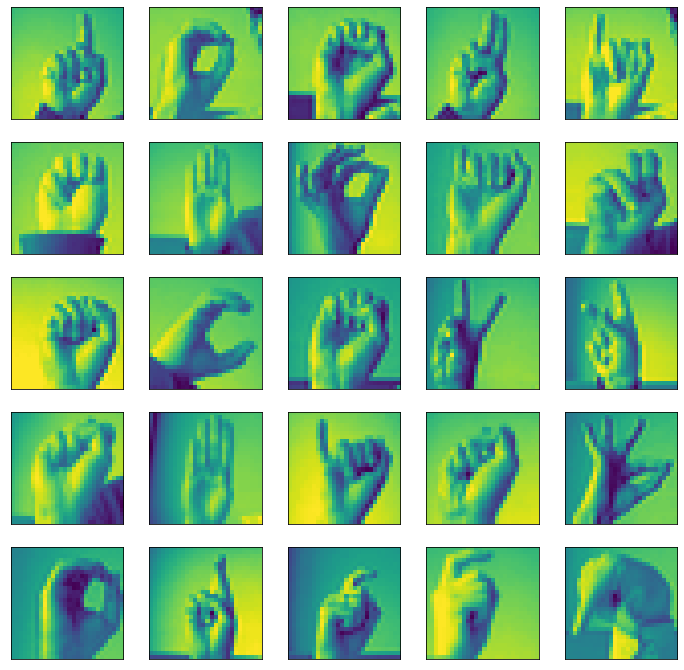

In [10]:
r = np.random.randint(x_train.shape[0], size=25)
imgs = x_train[r, :]

plt.figure(figsize=(12, 12))
for i in range(25):
    img = imgs[i].reshape(28, 28)
    plt.subplot(5, 5, i+1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

# Training Functions

In [11]:
def train_epoch(net, criterion, optimizer, dataloader):
  epoch_loss = 0
  epoch_true = 0
  epoch_all = 0
  train_loss = 0
  train_accuracy = 0
  i = 0

  net.train()
  for i, (x, y) in enumerate(dataloader):
    # x = x.reshape(x.shape[0], 784)
    # y = y.type(torch.FloatTensor)
    p = net(x)

    loss = criterion(p, y)
    epoch_loss += float(loss)

    predictions = p.argmax(-1)
    epoch_all += len(predictions)
    epoch_true += (predictions == y).sum()
    
    train_loss = epoch_loss / (i + 1)
    train_accuracy = epoch_true / epoch_all

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

  return train_loss, train_accuracy


def evaluate_epoch(net, criterion, dataloader):
  epoch_loss = 0
  epoch_true = 0
  epoch_all = 0
  eval_loss = 0
  eval_accuracy = 0
  i = 0

  net.eval()
  for i, (x, y) in enumerate(dataloader):
    # x = x.reshape(x.shape[0], 784)
    # y = y.type(torch.FloatTensor)
    p = net(x)

    loss = criterion(p, y)
    epoch_loss += float(loss)

    predictions = p.argmax(-1)
    epoch_all += len(predictions)
    epoch_true += (predictions == y).sum()

    eval_loss = epoch_loss / (i + 1)
    eval_accuracy = epoch_true / epoch_all

  return eval_loss, eval_accuracy


def getTime():
  loc_time = localtime()
  hour, min, sec = loc_time.tm_hour, loc_time.tm_min, loc_time.tm_sec
  return str(hour) + ":" + str(min) + ":" + str(sec)


def train_model(net, n_epochs, criterion, optimizer, train_loader, val_loader=None):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for e in range(n_epochs):
        train_loss, train_accuracy = train_epoch(net, criterion, optimizer, train_loader)
        if val_loader is not None:
            val_loss, val_accuracy = evaluate_epoch(net, criterion, val_loader)

        train_losses.append(train_loss)
        train_accuracies.append(float(train_accuracy))
        if val_loader is not None:
            val_losses.append(val_loss)
            val_accuracies.append(float(val_accuracy))

        print(f'[Epoch {e+1}]\t [{getTime()}]\t', end="")
        print(f'Train Loss: {train_loss:.4f}\tTrain Accuracy: {train_accuracy:.2f}\t', end="")
        if val_loader is not None:
            print(f'Validation Loss: {val_loss:.4f}\t\tValidation Accuracy: {val_accuracy:.2f}')
        else:
            print()
    
    return train_losses, train_accuracies, val_losses, val_accuracies

# Define Model

In [12]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()

        self.input_dim = 784
        self.hidden_dims=[1024, 2048, 256]
        self.output_dim = 24
        
        self.fc = nn.Sequential(
            nn.BatchNorm1d(self.input_dim),
            nn.Linear(self.input_dim, self.hidden_dims[0]),
            # nn.BatchNorm1d(self.hidden_dims[0]),
            nn.ReLU(),
            nn.Linear(self.hidden_dims[0], self.hidden_dims[1]),
            nn.BatchNorm1d(self.hidden_dims[1]),
            nn.ReLU(),
            nn.Linear(self.hidden_dims[1], self.hidden_dims[2]),
            nn.ReLU(),
            nn.Linear(self.hidden_dims[2], self.output_dim),
            nn.Softmax(dim=-1)
        )
    
    def forward(self, x):
        return self.fc(x)

## Test Model

### ADAM

In [13]:
net = MyNet()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3, weight_decay=1e-3)

train_loss, train_acc, val_loss, val_acc = train_model(net, 10, criterion, optimizer, train_loader, val_loader)

[Epoch 1]	 [19:8:43]	Train Loss: 2.5888	Train Accuracy: 0.68	Validation Loss: 2.4022		Validation Accuracy: 0.86
[Epoch 2]	 [19:8:53]	Train Loss: 2.3667	Train Accuracy: 0.89	Validation Loss: 2.3458		Validation Accuracy: 0.92
[Epoch 3]	 [19:9:4]	Train Loss: 2.3063	Train Accuracy: 0.95	Validation Loss: 2.2853		Validation Accuracy: 0.97
[Epoch 4]	 [19:9:14]	Train Loss: 2.2890	Train Accuracy: 0.97	Validation Loss: 2.2890		Validation Accuracy: 0.97
[Epoch 5]	 [19:9:24]	Train Loss: 2.2854	Train Accuracy: 0.97	Validation Loss: 2.2909		Validation Accuracy: 0.97
[Epoch 6]	 [19:9:33]	Train Loss: 2.2763	Train Accuracy: 0.98	Validation Loss: 2.2673		Validation Accuracy: 0.99
[Epoch 7]	 [19:9:43]	Train Loss: 2.2672	Train Accuracy: 0.99	Validation Loss: 2.2690		Validation Accuracy: 0.99
[Epoch 8]	 [19:9:52]	Train Loss: 2.2635	Train Accuracy: 0.99	Validation Loss: 2.2752		Validation Accuracy: 0.99
[Epoch 9]	 [19:10:2]	Train Loss: 2.2663	Train Accuracy: 0.99	Validation Loss: 2.2755		Validation Accuracy

In [14]:
y_hat = net.forward(x_test)

pred = torch.argmax(y_hat, axis=1)
acc = sum(y_test == pred) / y_test.shape[0] * 100
print(f'accuracy: {acc}')

accuracy: 79.47573852539062


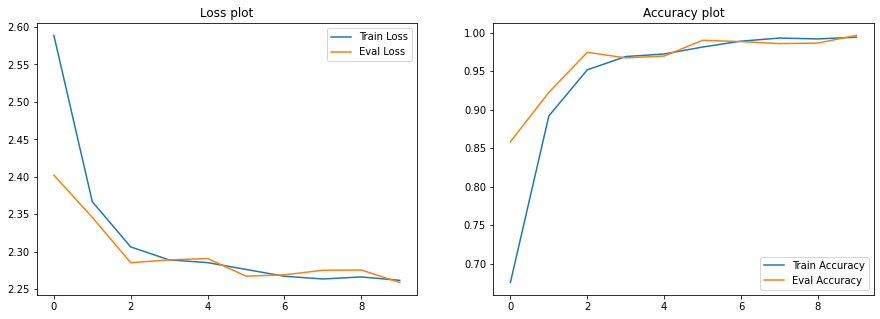

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axis = axes[0]
axis.plot(train_loss)
axis.plot(val_loss)
axis.set_title('Loss plot')
axis.legend(['Train Loss', 'Eval Loss'])

axis = axes[1]
axis.plot(train_acc)
axis.plot(val_acc)
axis.set_title('Accuracy plot')
axis.legend(['Train Accuracy', 'Eval Accuracy'])

### SGD

In [17]:
net = MyNet()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

train_loss, train_acc, val_loss, val_acc = train_model(net, 20, criterion, optimizer, train_loader, val_loader)

[Epoch 1]	 [19:14:2]	Train Loss: 3.1627	Train Accuracy: 0.12	Validation Loss: 3.1230		Validation Accuracy: 0.19
[Epoch 2]	 [19:14:9]	Train Loss: 3.0469	Train Accuracy: 0.23	Validation Loss: 2.9723		Validation Accuracy: 0.31
[Epoch 3]	 [19:14:17]	Train Loss: 2.8746	Train Accuracy: 0.42	Validation Loss: 2.7764		Validation Accuracy: 0.51
[Epoch 4]	 [19:14:25]	Train Loss: 2.6977	Train Accuracy: 0.58	Validation Loss: 2.6409		Validation Accuracy: 0.65
[Epoch 5]	 [19:14:32]	Train Loss: 2.5603	Train Accuracy: 0.74	Validation Loss: 2.4976		Validation Accuracy: 0.79
[Epoch 6]	 [19:14:40]	Train Loss: 2.4556	Train Accuracy: 0.82	Validation Loss: 2.4236		Validation Accuracy: 0.85
[Epoch 7]	 [19:14:48]	Train Loss: 2.4062	Train Accuracy: 0.86	Validation Loss: 2.3936		Validation Accuracy: 0.86
[Epoch 8]	 [19:14:56]	Train Loss: 2.3897	Train Accuracy: 0.86	Validation Loss: 2.3833		Validation Accuracy: 0.87
[Epoch 9]	 [19:15:4]	Train Loss: 2.3754	Train Accuracy: 0.88	Validation Loss: 2.3554		Validation A

In [18]:
y_hat = net.forward(x_test)

pred = torch.argmax(y_hat, axis=1)
acc = sum(y_test == pred) / y_test.shape[0] * 100
print(f'accuracy: {acc}')

accuracy: 79.99163055419922


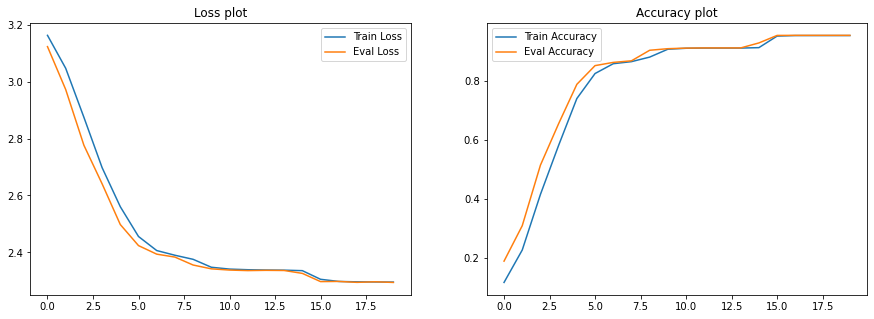

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axis = axes[0]
axis.plot(train_loss)
axis.plot(val_loss)
axis.set_title('Loss plot')
axis.legend(['Train Loss', 'Eval Loss'])

axis = axes[1]
axis.plot(train_acc)
axis.plot(val_acc)
axis.set_title('Accuracy plot')
axis.legend(['Train Accuracy', 'Eval Accuracy'])

# New Model with Dropout

In [20]:
class MyNet_d(nn.Module):
    def __init__(self):
        super(MyNet_d, self).__init__()

        self.input_dim = 784
        self.hidden_dims=[1024, 2048, 256]
        self.output_dim = 24
        
        self.fc = nn.Sequential(
            nn.BatchNorm1d(self.input_dim),
            nn.Linear(self.input_dim, self.hidden_dims[0]),
            # nn.BatchNorm1d(self.hidden_dims[0]),
            nn.ReLU(),
            nn.Dropout1d(p=0.1),
            nn.Linear(self.hidden_dims[0], self.hidden_dims[1]),
            nn.BatchNorm1d(self.hidden_dims[1]),
            nn.ReLU(),
            nn.Dropout1d(p=0.1),
            nn.Linear(self.hidden_dims[1], self.hidden_dims[2]),
            nn.ReLU(),
            # nn.Dropout1d(p=0.1),
            nn.Linear(self.hidden_dims[2], self.output_dim),
            nn.Softmax(dim=-1)
        )
    
    def forward(self, x):
        return self.fc(x)

## Test Model

In [22]:
net_d = MyNet_d()

criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(net_d.parameters(), lr=1e-3, weight_decay=1e-3)
optimizer = torch.optim.SGD(net_d.parameters(), lr=0.01, momentum=0.9)
train_loss, train_acc, val_loss, val_acc = train_model(net_d, 30, criterion, optimizer, train_loader, val_loader)

[Epoch 1]	 [19:19:57]	Train Loss: 3.1604	Train Accuracy: 0.10	Validation Loss: 3.1141		Validation Accuracy: 0.14
[Epoch 2]	 [19:20:5]	Train Loss: 3.0713	Train Accuracy: 0.19	Validation Loss: 2.9827		Validation Accuracy: 0.31
[Epoch 3]	 [19:20:13]	Train Loss: 2.9461	Train Accuracy: 0.33	Validation Loss: 2.8383		Validation Accuracy: 0.50
[Epoch 4]	 [19:20:20]	Train Loss: 2.8092	Train Accuracy: 0.47	Validation Loss: 2.6896		Validation Accuracy: 0.64
[Epoch 5]	 [19:20:28]	Train Loss: 2.6986	Train Accuracy: 0.58	Validation Loss: 2.5609		Validation Accuracy: 0.76
[Epoch 6]	 [19:20:36]	Train Loss: 2.6079	Train Accuracy: 0.66	Validation Loss: 2.4729		Validation Accuracy: 0.81
[Epoch 7]	 [19:20:44]	Train Loss: 2.5782	Train Accuracy: 0.67	Validation Loss: 2.4432		Validation Accuracy: 0.84
[Epoch 8]	 [19:20:52]	Train Loss: 2.5475	Train Accuracy: 0.70	Validation Loss: 2.3999		Validation Accuracy: 0.89
[Epoch 9]	 [19:21:0]	Train Loss: 2.5161	Train Accuracy: 0.74	Validation Loss: 2.3688		Validation 

In [23]:
y_hat = net_d.forward(x_train)

pred = torch.argmax(y_hat, axis=1)
acc = sum(y_train == pred) / y_train.shape[0] * 100
print(f'Train Accuracy: {acc}')


y_hat = net_d.forward(x_test)

pred = torch.argmax(y_hat, axis=1)
acc = sum(y_test == pred) / y_test.shape[0] * 100
print(f'Test Accuracy: {acc}')

Train Accuracy: 99.43061828613281
Test Accuracy: 81.94366455078125


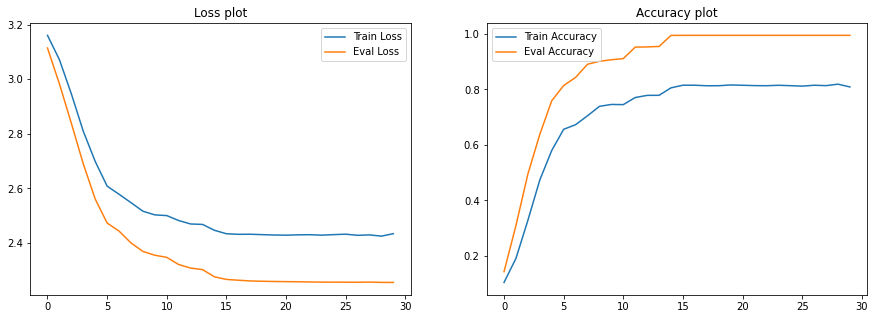

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axis = axes[0]
axis.plot(train_loss)
axis.plot(val_loss)
axis.set_title('Loss plot')
axis.legend(['Train Loss', 'Eval Loss'])

axis = axes[1]
axis.plot(train_acc)
axis.plot(val_acc)
axis.set_title('Accuracy plot')
axis.legend(['Train Accuracy', 'Eval Accuracy'])

# Video Capture

In [24]:
import cv2
from google.colab.output import eval_js
from IPython.display import display, Javascript, Image
from base64 import b64decode, b64encode

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

<IPython.core.display.Javascript object>